In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_excel(r"SuperStore Sales DataSet.xlsx")  # Update with your actual file path

# Show first few rows
print(df.head())

# Basic info
print(df.info())

# Check for missing values
print(df.isnull().sum())


   Row ID+O6G3A1:R6        Order_ID Order_Date  Ship_Date       Ship_Mode  \
0              4918  CA-2019-160304 2019-01-01 2019-01-07  Standard Class   
1              4919  CA-2019-160304 2019-01-02 2019-01-07  Standard Class   
2              4920  CA-2019-160304 2019-01-02 2019-01-07  Standard Class   
3              3074  CA-2019-125206 2019-01-03 2019-01-05     First Class   
4              8604  US-2019-116365 2019-01-03 2019-01-08  Standard Class   

  Customer_ID      Customer_Name    Segment        Country          City  ...  \
0    BM-11575      Brendan Murry  Corporate  United States  Gaithersburg  ...   
1    BM-11575      Brendan Murry  Corporate  United States  Gaithersburg  ...   
2    BM-11575      Brendan Murry  Corporate  United States  Gaithersburg  ...   
3    LR-16915       Lena Radford   Consumer  United States   Los Angeles  ...   
4    CA-12310  Christine Abelman  Corporate  United States   San Antonio  ...   

        Product_ID         Category       P_Name  

Data Preprocessing

In [65]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_excel('SuperStore Sales DataSet.xlsx')

# Clean the data
# Drop any duplicate rows
df.drop_duplicates(inplace=True)

# Check for missing values and handle them
df.isnull().sum()

# Handle missing values - let's fill missing numerical columns with the mean, and categorical columns with the mode
df['P_Rate'].fillna(df['P_Rate'].mean(), inplace=True)
df['Profit'].fillna(df['Profit'].mean(), inplace=True)
df['Category'].fillna(df['Category'].mode()[0], inplace=True)

# Convert Order_Date and Ship_Date to datetime format
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df['Ship_Date'] = pd.to_datetime(df['Ship_Date'])

# Encode categorical variables using Label Encoding or One-Hot Encoding
label_encoder = LabelEncoder()

# Encode categorical variables with label encoding for simplicity
df['Ship_Mode'] = label_encoder.fit_transform(df['Ship_Mode'])
df['Segment'] = label_encoder.fit_transform(df['Segment'])
df['Category'] = label_encoder.fit_transform(df['Category'])
df['Payment_Mode'] = label_encoder.fit_transform(df['Payment_Mode'])

# Create the target variable (e.g., whether the product was returned or not)
df['Returned'] = df['Returns'].apply(lambda x: 1 if x > 0 else 0)  # Binary classification: 1 for returned, 0 for not


In [66]:
print(df.columns.tolist())

['Row ID+O6G3A1:R6', 'Order_ID', 'Order_Date', 'Ship_Date', 'Ship_Mode', 'Customer_ID', 'Customer_Name', 'Segment', 'Country', 'City', 'State', 'Region', 'Product_ID', 'Category', 'P_Name', 'Product_Name', 'P_Rate', 'Quantity', 'Profit', 'Returns', 'Payment_Mode', 'Total Sales', 'Returned']


 Exploratory Data Analysis (EDA)

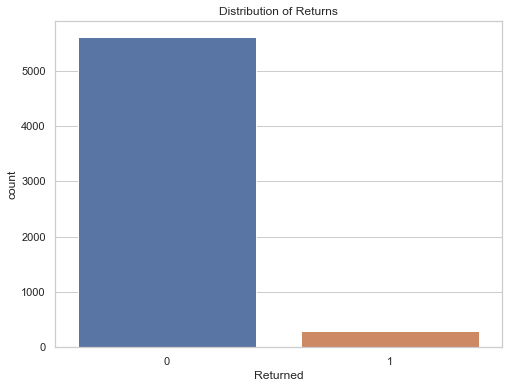

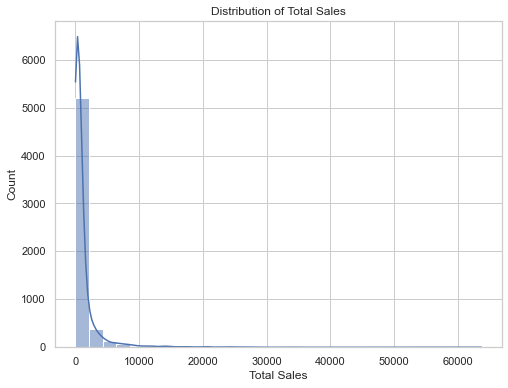

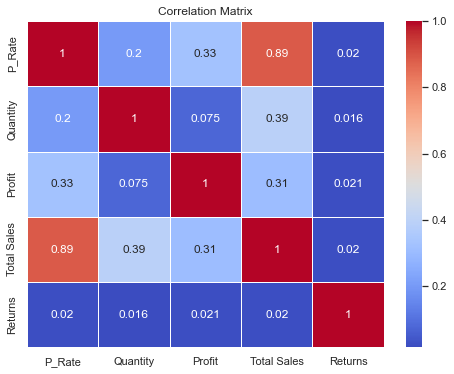

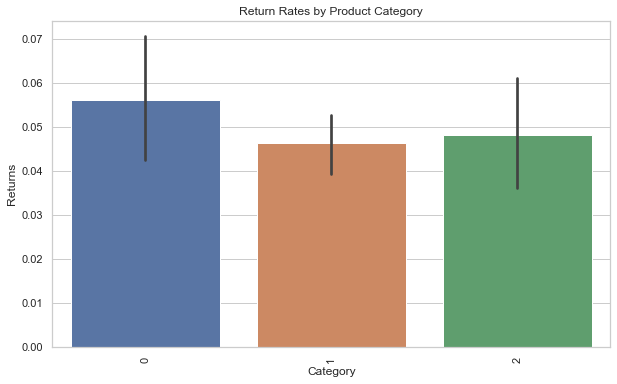

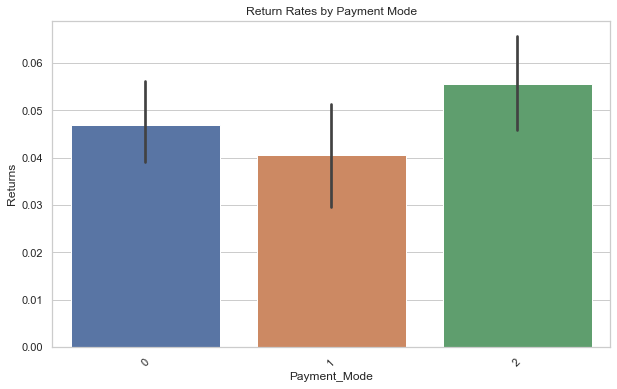

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for the plots
sns.set(style="whitegrid")

# Distribution of Returns
plt.figure(figsize=(8, 6))
sns.countplot(x='Returned', data=df)
plt.title('Distribution of Returns')
plt.show()

# Distribution of Total Sales
plt.figure(figsize=(8, 6))
sns.histplot(df['Total Sales'], bins=30, kde=True)
plt.title('Distribution of Total Sales')
plt.show()

# Correlation heatmap to visualize relationships between numerical features
corr_matrix = df[['P_Rate', 'Quantity', 'Profit', 'Total Sales', 'Returns']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Return rates across different categories
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Returns', data=df)
plt.title('Return Rates by Product Category')
plt.xticks(rotation=90)
plt.show()

# Return rates across different payment modes
plt.figure(figsize=(10, 6))
sns.barplot(x='Payment_Mode', y='Returns', data=df)
plt.title('Return Rates by Payment Mode')
plt.xticks(rotation=45)
plt.show()


Modeling

In [68]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

# Feature selection: Drop non-numerical columns or those not needed for the model
X = df[['P_Rate', 'Quantity', 'Profit', 'Total Sales', 'Ship_Mode', 'Segment', 'Category', 'Payment_Mode']]
y = df['Returned']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Models to try: Logistic Regression, Random Forest, XGBoost

# 1. Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_preds = logreg.predict(X_test)

# 2. Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

# 3. XGBoost
xgb = XGBClassifier(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)

# Evaluate models
print("Logistic Regression Accuracy: ", accuracy_score(y_test, logreg_preds))
print(classification_report(y_test, logreg_preds))

print("Random Forest Accuracy: ", accuracy_score(y_test, rf_preds))
print(classification_report(y_test, rf_preds))

print("XGBoost Accuracy: ", accuracy_score(y_test, xgb_preds))
print(classification_report(y_test, xgb_preds))

# Cross-validation to evaluate model performance
logreg_cv = cross_val_score(logreg, X, y, cv=5)
rf_cv = cross_val_score(rf, X, y, cv=5)
xgb_cv = cross_val_score(xgb, X, y, cv=5)

print(f'Logistic Regression CV Mean Score: {logreg_cv.mean()}')
print(f'Random Forest CV Mean Score: {rf_cv.mean()}')
print(f'XGBoost CV Mean Score: {xgb_cv.mean()}')


C:\Users\MMM\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy:  0.950875211744777
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1684
           1       0.00      0.00      0.00        87

    accuracy                           0.95      1771
   macro avg       0.48      0.50      0.49      1771
weighted avg       0.90      0.95      0.93      1771

Random Forest Accuracy:  0.9503105590062112
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1684
           1       0.00      0.00      0.00        87

    accuracy                           0.95      1771
   macro avg       0.48      0.50      0.49      1771
weighted avg       0.90      0.95      0.93      1771

XGBoost Accuracy:  0.9435347261434218
              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1684
           1       0.00      0.00      0.00        87

    accuracy                           0.94      17

C:\Users\MMM\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MMM\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MMM\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MMM\anaconda3\lib\site-packages\sklearn\linear_model

Logistic Regression CV Mean Score: 0.9510252730377877
Random Forest CV Mean Score: 0.9510252730377877
XGBoost CV Mean Score: 0.9459406707903385


Model Evaluation

In [69]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Models to try: Logistic Regression, Random Forest, XGBoost

# 1. Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
logreg_preds = logreg.predict(X_test)

# 2. Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

# 3. XGBoost
xgb = XGBClassifier(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)

# Evaluate Logistic Regression
print("Logistic Regression - Accuracy Score: ", accuracy_score(y_test, logreg_preds))
print("Logistic Regression - Classification Report: \n", classification_report(y_test, logreg_preds))
print("Logistic Regression - Confusion Matrix: \n", confusion_matrix(y_test, logreg_preds))

# Evaluate Random Forest
print("Random Forest - Accuracy Score: ", accuracy_score(y_test, rf_preds))
print("Random Forest - Classification Report: \n", classification_report(y_test, rf_preds))
print("Random Forest - Confusion Matrix: \n", confusion_matrix(y_test, rf_preds))

# Evaluate XGBoost
print("XGBoost - Accuracy Score: ", accuracy_score(y_test, xgb_preds))
print("XGBoost - Classification Report: \n", classification_report(y_test, xgb_preds))
print("XGBoost - Confusion Matrix: \n", confusion_matrix(y_test, xgb_preds))

# Cross-validation to evaluate model performance
logreg_cv = cross_val_score(logreg, X, y, cv=5)
rf_cv = cross_val_score(rf, X, y, cv=5)
xgb_cv = cross_val_score(xgb, X, y, cv=5)

print(f'Logistic Regression CV Mean Score: {logreg_cv.mean()}')
print(f'Random Forest CV Mean Score: {rf_cv.mean()}')
print(f'XGBoost CV Mean Score: {xgb_cv.mean()}')


C:\Users\MMM\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression - Accuracy Score:  0.950875211744777
Logistic Regression - Classification Report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1684
           1       0.00      0.00      0.00        87

    accuracy                           0.95      1771
   macro avg       0.48      0.50      0.49      1771
weighted avg       0.90      0.95      0.93      1771

Logistic Regression - Confusion Matrix: 
 [[1684    0]
 [  87    0]]
Random Forest - Accuracy Score:  0.9503105590062112
Random Forest - Classification Report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97      1684
           1       0.00      0.00      0.00        87

    accuracy                           0.95      1771
   macro avg       0.48      0.50      0.49      1771
weighted avg       0.90      0.95      0.93      1771

Random Forest - Confusion Matrix: 
 [[1683    1]
 [  87    0]]
XGBoost - Accurac

C:\Users\MMM\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MMM\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MMM\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\MMM\anaconda3\lib\site-packages\sklearn\linear_model

Logistic Regression CV Mean Score: 0.9510252730377877
Random Forest CV Mean Score: 0.9510252730377877
XGBoost CV Mean Score: 0.9459406707903385


Feature Importance Plot

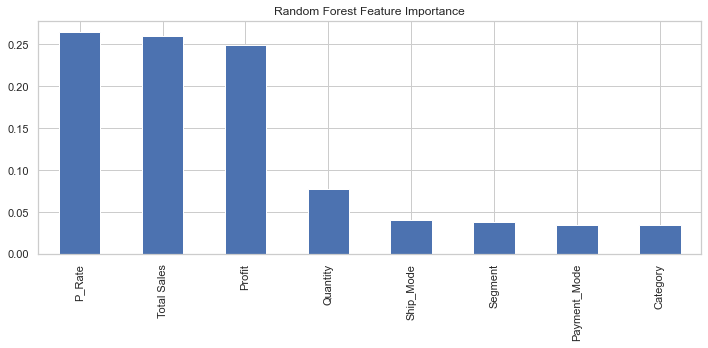

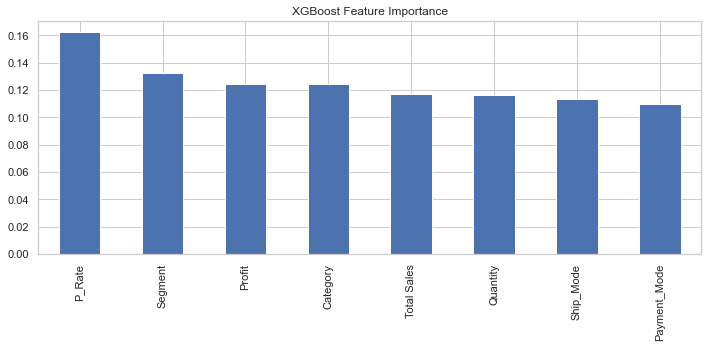

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Assuming you have already preprocessed and split your data
# Let's assume X_train and y_train are already defined

# Example with Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Get feature importances
importances_rf = pd.Series(rf.feature_importances_, index=X.columns)
importances_rf.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5), title='Random Forest Feature Importance')
plt.tight_layout()
plt.show()

# Example with XGBoost
xgb = XGBClassifier(n_estimators=100, random_state=42)
xgb.fit(X_train, y_train)

# Get feature importances
importances_xgb = pd.Series(xgb.feature_importances_, index=X.columns)
importances_xgb.sort_values(ascending=False).plot(kind='bar', figsize=(10, 5), title='XGBoost Feature Importance')
plt.tight_layout()
plt.show()


In [71]:
! pip install flask pandas matplotlib scikit-learn xgboost

In [72]:
/ecommerce_dashboard
    /static
        /css
        /js
    /templates
        index.html
        result.html
    app.py
    model.py


IndentationError: unexpected indent (815844751.py, line 2)

In [73]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pickle

# Load your dataset (adjust path as needed)
df = pd.read_excel('SuperStore Sales DataSet.xlsx')

# Basic preprocessing (make sure 'Returns' column exists and is binary: 0/1)
df['Returns'] = df['Returns'].fillna(0).astype(int)

# Feature selection – adjust as needed
features = ['Quantity', 'Profit']  # Add more features if necessary
X = df[features]
y = df['Returns']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Save the model to a pickle file
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("✅ Model trained and saved as model.pkl")


✅ Model trained and saved as model.pkl


In [74]:
import pickle

# Load the trained model
with open('model.pkl', 'rb') as model_file:
    model = pickle.load(model_file)

In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pickle

# Load your data
df = pd.read_excel("SuperStore Sales DataSet.xlsx")

# Example preprocessing (you can customize this)
df = df.dropna()
df['Returns'] = df['Returns'].astype(int)

# Feature selection
X = df[['Quantity', 'Profit']]  # Add other relevant features
y = df['Returns']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Save the model
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("Model trained and saved as model.pkl")


Model trained and saved as model.pkl


In [76]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load data
df = pd.read_excel("SuperStore Sales DataSet.xlsx")

# Example preprocessing (customize as needed)
df.dropna(subset=['Profit', 'Quantity', 'Returns'], inplace=True)
df['Returns'] = df['Returns'].astype(int)  # ensure binary (0/1)

# Features and target
X = df[['Profit', 'Quantity']]  # Add more features if needed
y = df['Returns']

# Train model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Save the model
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("✅ Model saved as model.pkl")


✅ Model saved as model.pkl


In [77]:
import pandas as pd
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
df = pd.read_excel("SuperStore Sales DataSet.xlsx")

# Preprocess the data
df.dropna(subset=['Profit', 'Quantity', 'Returns'], inplace=True)
df['Returns'] = df['Returns'].astype(int)

# Feature selection
X = df[['Profit', 'Quantity']]
y = df['Returns']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Save the model
with open('model.pkl', 'wb') as f:
    pickle.dump(model, f)

print("✅ Model saved as model.pkl")


✅ Model saved as model.pkl


In [78]:
import sklearn
print(sklearn.__version__)


1.0.2


In [79]:
! pip install --upgrade scikit-learn==1.3.0

  Using cached scikit_learn-1.3.0-cp39-cp39-win_amd64.whl (9.3 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2


In [80]:
scaler = StandardScaler()

In [81]:
from sklearn.preprocessing import StandardScaler

# Define the input data (this should be the data you want to scale)
user_input = [[100, 25], [150, 30]]  # Replace this with your actual input data

# Initialize the scaler
scaler = StandardScaler()

# Scale the input data
user_input_scaled = scaler.fit_transform(user_input)

# Now, user_input_scaled contains the scaled version of your input data
print(user_input_scaled)


[[-1. -1.]
 [ 1.  1.]]


In [82]:
# Assuming you have a trained model (e.g., loaded with pickle)
# For example:
# model = pickle.load(open('model.pkl', 'rb'))

# Use the scaled user input for prediction
prediction = model.predict(user_input_scaled)

print(f"Prediction: {prediction}")


Prediction: [0 0]


C:\Users\MMM\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  X_feature_names = _get_feature_names(X)


In [83]:
! pip install scikit-learn==1.0.2

  Using cached scikit_learn-1.0.2-cp39-cp39-win_amd64.whl (7.2 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.0
    Uninstalling scikit-learn-1.3.0:
      Successfully uninstalled scikit-learn-1.3.0


In [84]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)  # Assuming X_train is your training data
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)
